Step 1: Dataset Overview (First 5 Rows):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0      

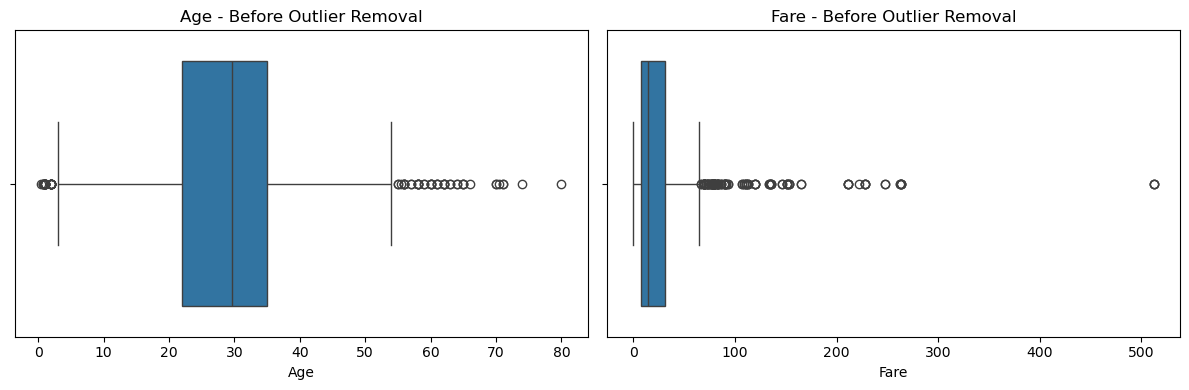

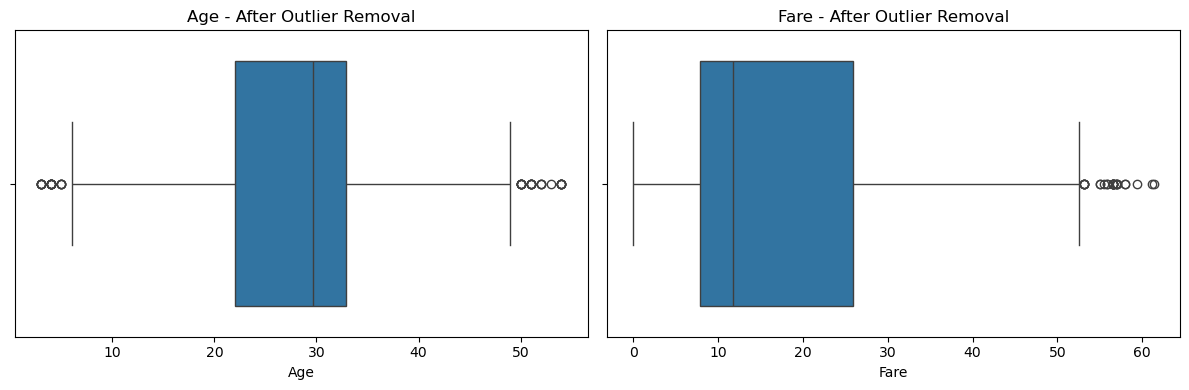


Cleaned Dataset Preview (First 5 Rows):
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1  0.372549      1      0   
2                        Heikkinen, Miss. Laina    0  0.450980      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.627451      1      0   
4                      Allen, Mr. William Henry    1  0.627451      0      0   
5                              Moran, Mr. James    1  0.523512      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  Deck_B  Deck_C  Deck_D  \
0         A/5 21171  0.118118       False        True   False   False   False   
2  STON/O2. 3101282  0.129115       False        True   False   False   False   
3            11380

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def preprocess_titanic_data(df, visualize=True):
    df['Cabin'] = df['Cabin'].fillna('Unknown')
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else np.nan)
    deck_impute_map = {1: 'C', 2: 'E', 3: 'G'}
    df['Deck'] = df['Deck'].fillna(df['Pclass'].map(deck_impute_map))
    df = df.drop('Cabin', axis=1)

    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df = df.dropna()

    if visualize:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df['Age'])
        plt.title("Age - Before Outlier Removal")
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df['Fare'])
        plt.title("Fare - Before Outlier Removal")
        plt.tight_layout()
        plt.show()

    Q1_age = df['Age'].quantile(0.25)
    Q3_age = df['Age'].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    df = df[(df['Age'] >= Q1_age - 1.5 * IQR_age) & (df['Age'] <= Q3_age + 1.5 * IQR_age)]

    Q1_fare = df['Fare'].quantile(0.25)
    Q3_fare = df['Fare'].quantile(0.75)
    IQR_fare = Q3_fare - Q1_fare
    df = df[(df['Fare'] >= Q1_fare - 1.5 * IQR_fare) & (df['Fare'] <= Q3_fare + 1.5 * IQR_fare)]

    if visualize:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df['Age'])
        plt.title("Age - After Outlier Removal")
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df['Fare'])
        plt.title("Fare - After Outlier Removal")
        plt.tight_layout()
        plt.show()

    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=True)

    scaler = MinMaxScaler()
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

    return df

if __name__ == "__main__":
    df = pd.read_csv('titanic.csv')

    print("Step 1: Dataset Overview (First 5 Rows):")
    print(df.head())

    print("\nData Types & Missing Values:")
    print(df.info())

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nMissing Values Count:")
    print(df.isnull().sum())

    cleaned_df = preprocess_titanic_data(df)

    print("\nCleaned Dataset Preview (First 5 Rows):")
    print(cleaned_df.head())

    print("\nCleaned Dataset Shape:", cleaned_df.shape)
